In [121]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [122]:
df = pd.read_csv('./Healthcare-Diabetes.csv')

In [123]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [124]:
df.shape

(2768, 9)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [127]:
# Count of null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

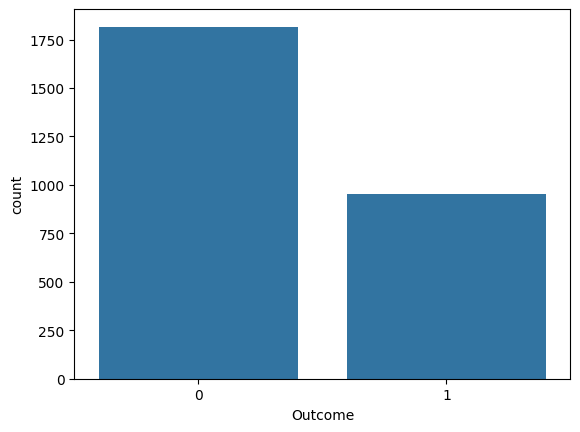

In [128]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = df)

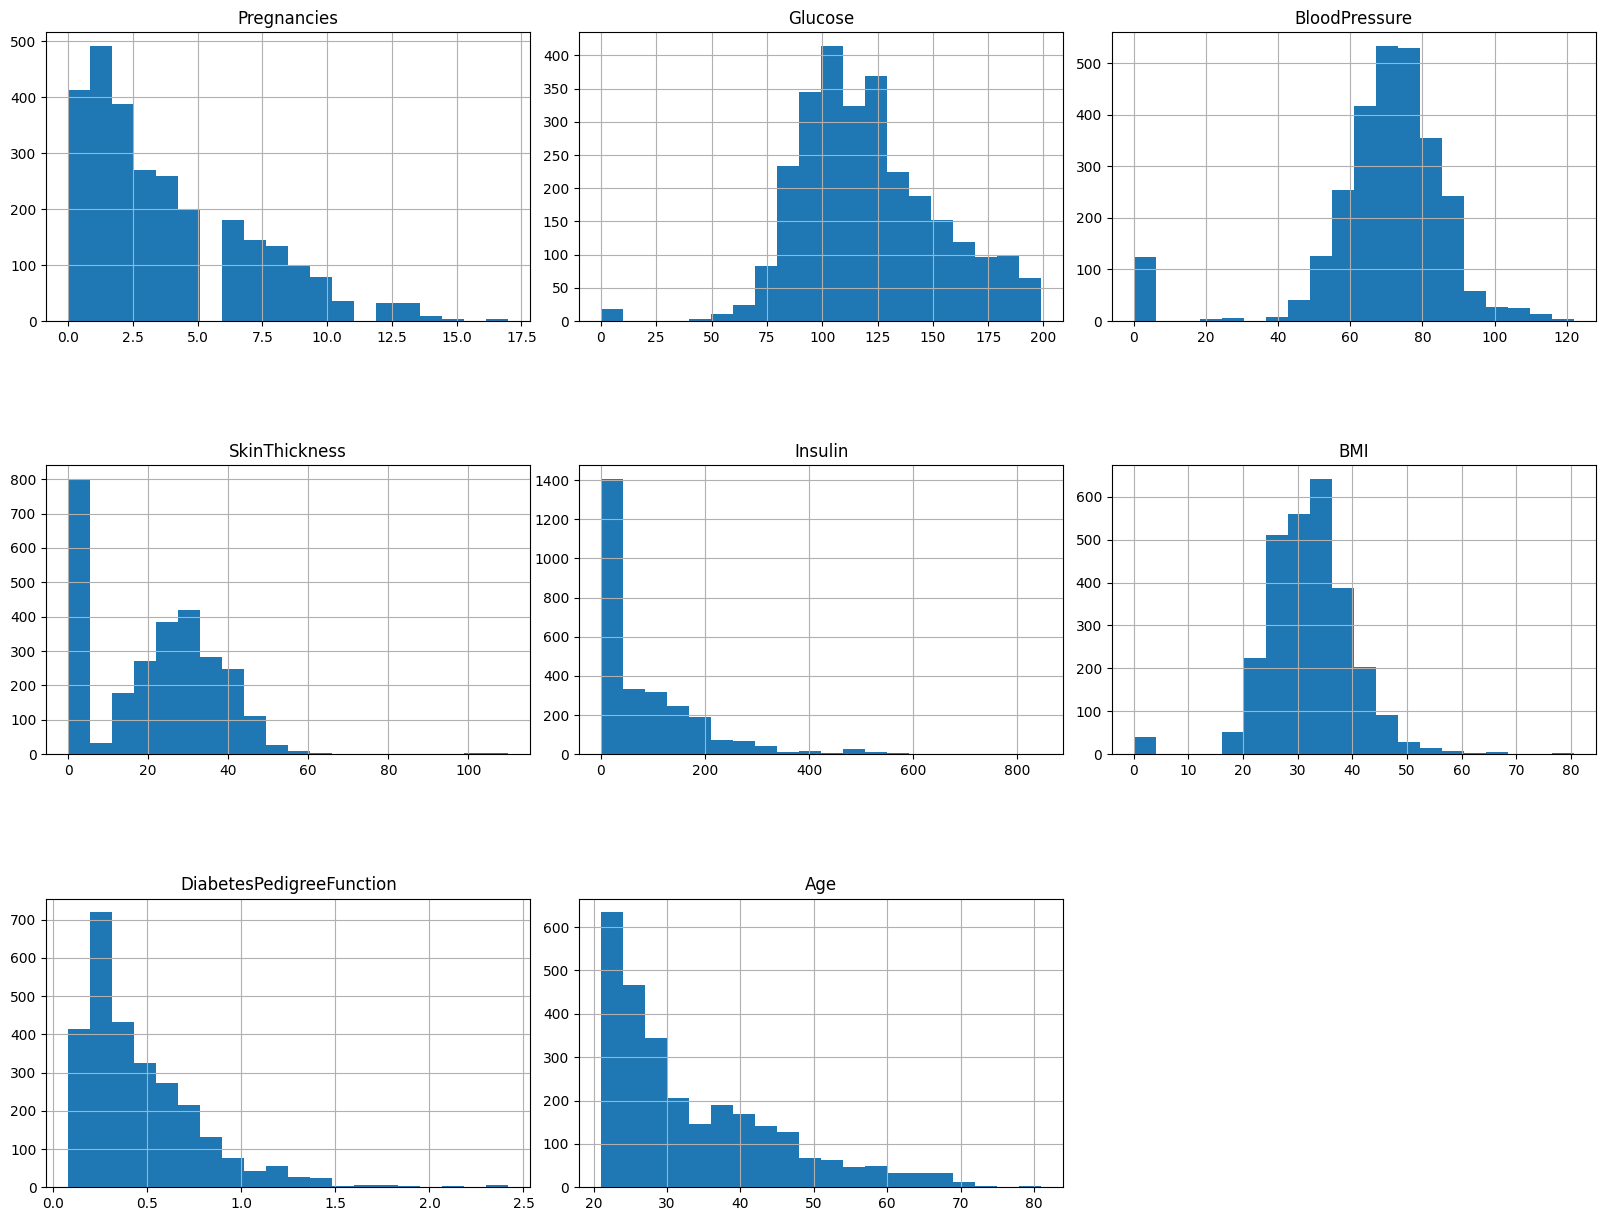

In [129]:
import itertools
import math
import matplotlib.pyplot as plt

col = df.columns[:8]
plt.subplots(figsize=(20, 15))
length = len(col)
num_rows = math.ceil(length / 3)  # Calculate the number of rows rounded up to the nearest integer

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(num_rows, 3, j + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    df[i].hist(bins=20)
    plt.title(i)

plt.show()

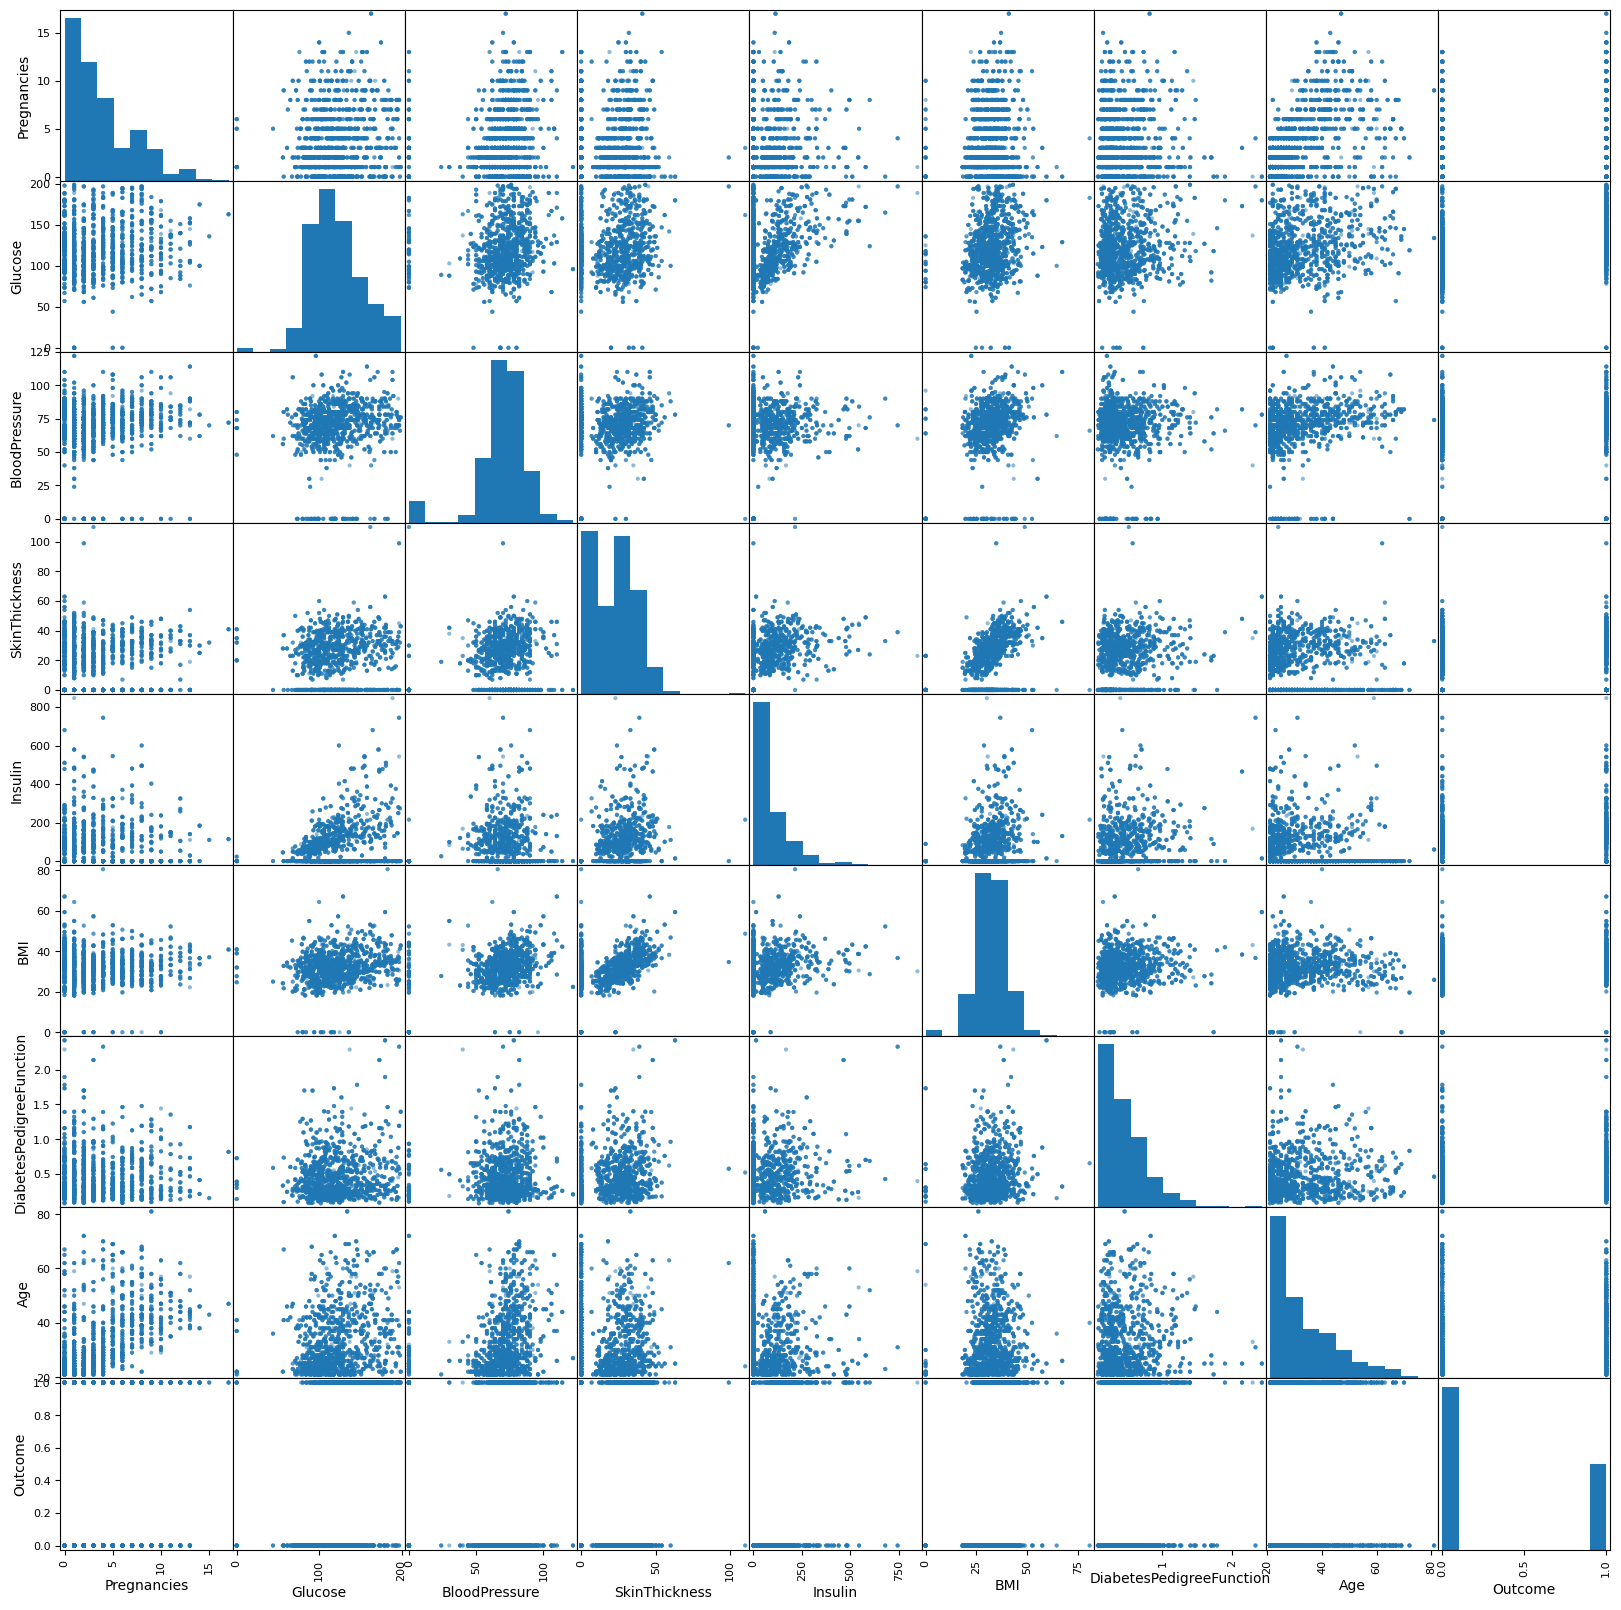

In [130]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

scatter_matrix(df, figsize=(20, 20))
plt.show()

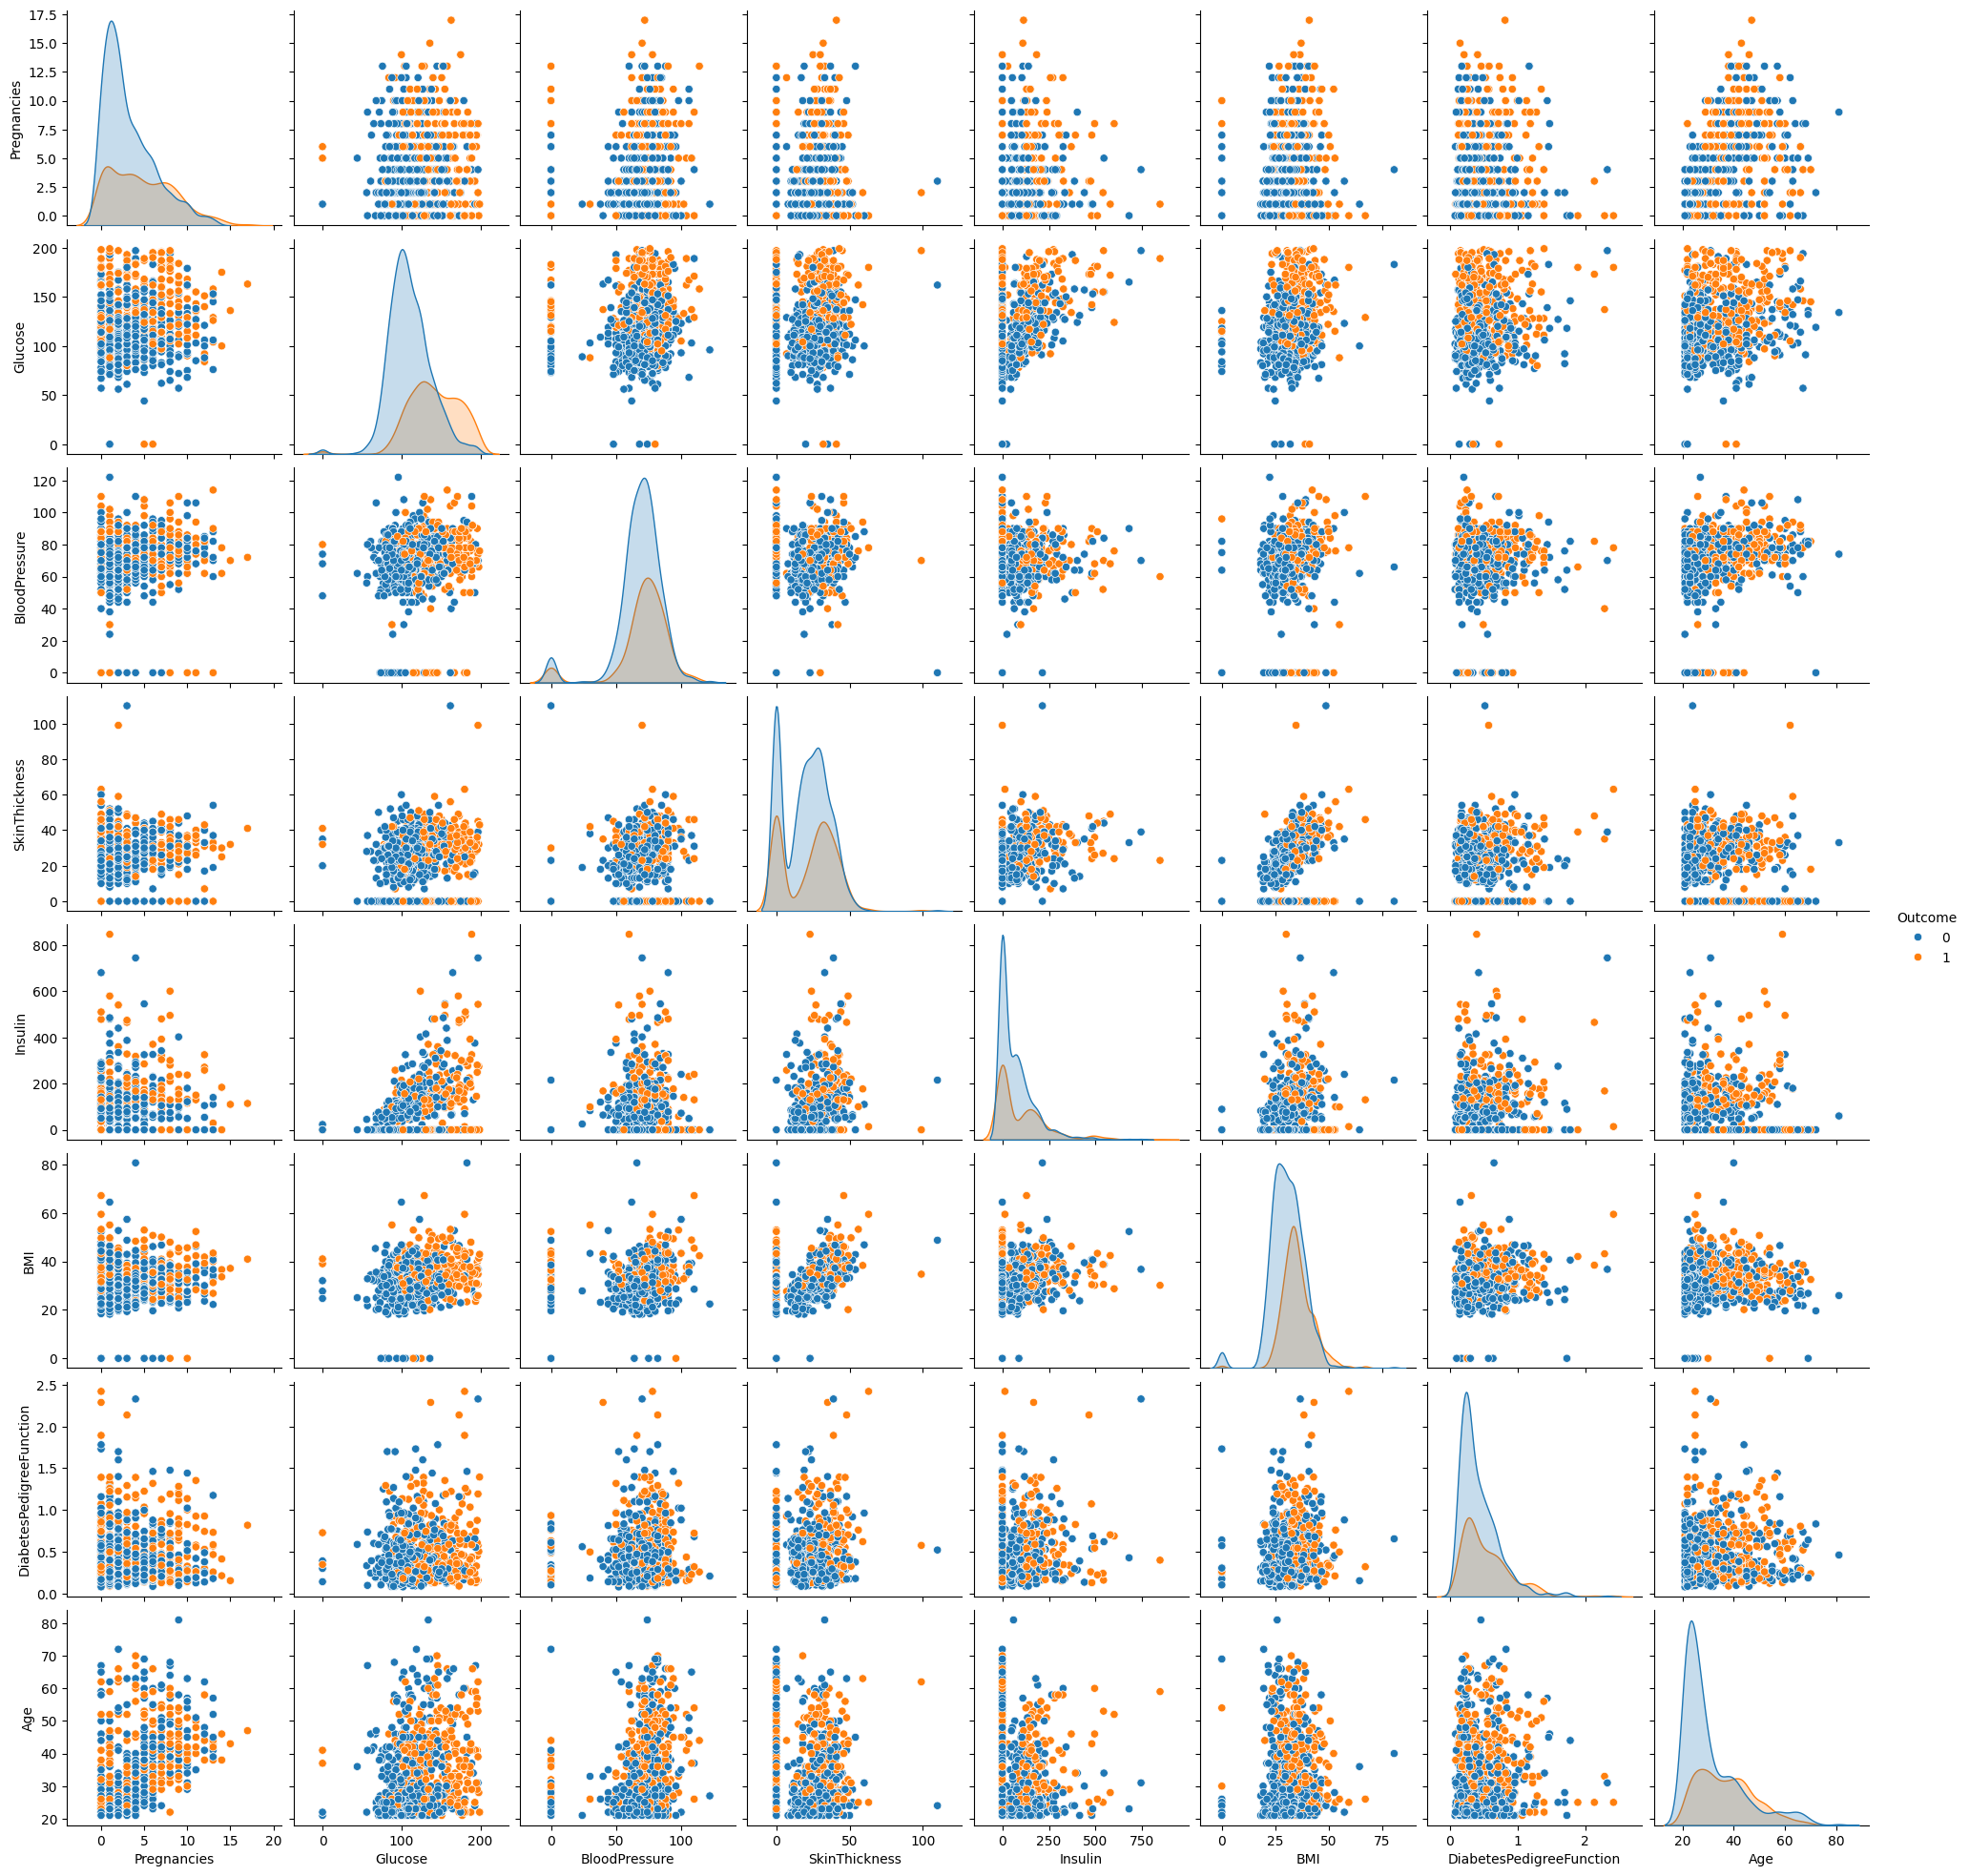

In [131]:
sns.pairplot(data = df, hue = 'Outcome')

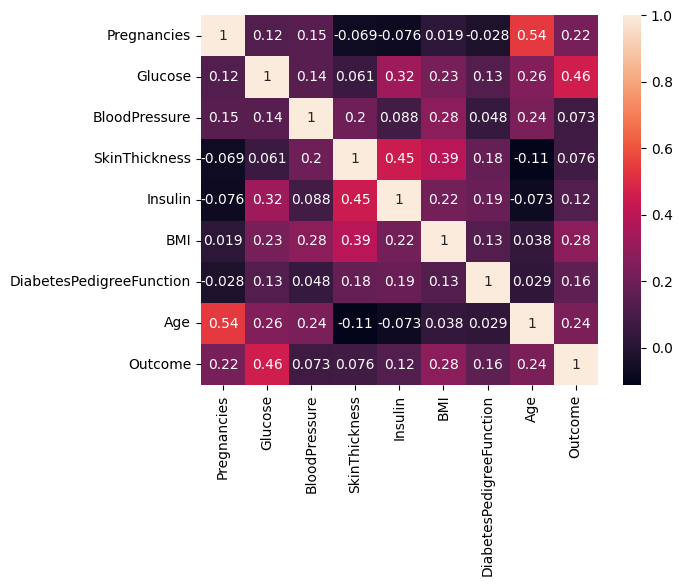

In [132]:
# Heatmap
sns.heatmap(df.corr(), annot = True)
plt.show()

##Step 3: Data Preprocessing

In [133]:
df_new = df

In [134]:
df_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = df_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [135]:
df_new.isnull().sum()

Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64

In [136]:
# Replacing NaN with mean values
df_new["Glucose"].fillna(df_new["Glucose"].mean(), inplace = True)
df_new["BloodPressure"].fillna(df_new["BloodPressure"].mean(), inplace = True)
df_new["SkinThickness"].fillna(df_new["SkinThickness"].mean(), inplace = True)
df_new["Insulin"].fillna(df_new["Insulin"].mean(), inplace = True)
df_new["BMI"].fillna(df_new["BMI"].mean(), inplace = True)

shifts central tendency to mean.
can introduce bias.


In [137]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000000,6.00000,17.00
Glucose,2768.0,121.895273,30.500960,44.000,99.000,118.000000,141.00000,199.00
BloodPressure,2768.0,72.404086,11.988255,24.000,64.000,72.000000,80.00000,122.00
SkinThickness,2768.0,29.289634,9.031265,7.000,25.000,29.289634,32.00000,110.00
Insulin,2768.0,154.237830,81.678056,14.000,120.000,154.237830,154.23783,846.00
BMI,2768.0,32.596665,7.103424,18.200,27.575,32.400000,36.62500,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375000,0.62400,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000000,40.00000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000000,1.00000,1.00


In [138]:
# from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

# Fit and transform your data
df_scaled = sc.fit_transform(df_new)


X_scaled = (X - X_min) / (X_max - X_min)


In [139]:
adf_scaled = pd.DataFrame(df_scaled)

In [140]:
# Assuming df_scaled is a NumPy array
X = df_scaled[:, [1, 4, 5, 7]]
Y = df_scaled[:, 8]

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = df_new['Outcome'] )

In [142]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (2214, 4)
X_test shape: (554, 4)
Y_train shape: (2214,)
Y_test shape: (554,)


##Step 4: Data Modelling

In [143]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

Logistic Regression:

Type: Linear classification algorithm.
Use: Well-suited for binary classification problems.
Key Feature: Estimates the probability of an instance belonging to a particular class.
Strengths: Simple, interpretable, and often used as a baseline model.
Weaknesses: Assumes a linear relationship between features and the log-odds of the target.

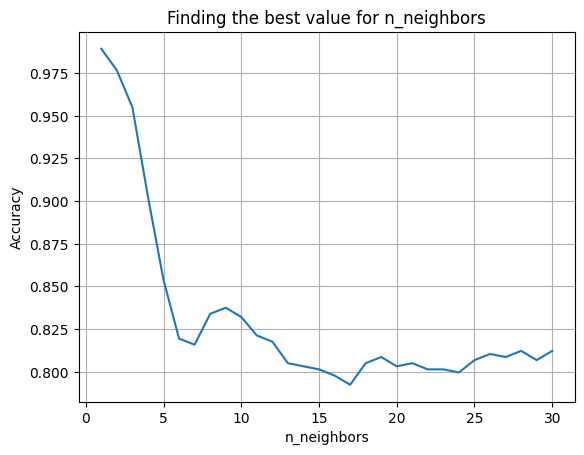

In [144]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = []  # Use a Python list to store accuracy scores

for i in range(1, 31):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    accuracy = metrics.accuracy_score(Y_test, prediction)
    acc.append(accuracy)

import matplotlib.pyplot as plt

plt.plot(X_axis, acc)
plt.title("Finding the best value for n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


a simple hyperparameter tuning exercise, and the plot helps us visualize how the accuracy changes with different values of "n_neighbors".  we plan to chose 3 n_neighbors instead of 1 as it would be a good choice to balance betweent the senistivity and accuracy

In [145]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

K-Nearest Neighbors (KNN):

Type: Instance-based, non-parametric classification algorithm.

Use: Can be used for both binary and multiclass classification problems.

Key Feature: Classifies instances based on the majority class among their k-nearest neighbors.

Strengths: Intuitive, no assumptions about the underlying data distribution.
Weaknesses: Sensitive to the choice of hyperparameters, can be computationally expensive with large datasets.

In [146]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

Support Vector Classifier (SVC):

Type: Linear classification algorithm.

Use: Effective for binary classification problems and can be extended to multiclass cases.

Key Feature: Finds the hyperplane that maximizes the margin between classes.

Strengths: Effective in high-dimensional spaces, works well with small to medium-sized datasets.

Weaknesses: Sensitivity to the choice of the kernel function, can be computationally expensive.

In [147]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

Naive Bayes:

Type: Probabilistic classification algorithm.

Use: Often used for text classification and spam detection.

Key Feature: Applies Bayes' theorem with the "naive" assumption of feature independence.

Strengths: Simple, fast, works well with high-dimensional data.

Weaknesses: Assumes feature independence (naive assumption) which may not hold in all cases.

In [148]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Decision Tree:

Type: Tree-based classification algorithm.

Use: Suitable for both binary and multiclass classification problems.

Key Feature: Represents decisions as a tree structure with nodes and branches.

Strengths: Can capture complex decision boundaries, interpretable, and handles
feature interactions.

Weaknesses: Prone to overfitting, may create deep trees with small datasets.

In [149]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

Random Forest:

Type: Ensemble learning method using decision trees.

Use: Effective for binary and multiclass classification and regression problems.

Key Feature: Combines multiple decision trees to make predictions and reduce
overfitting.

Strengths: Improved generalization, robust to overfitting, handles
high-dimensional data.

Weaknesses: Less interpretable than individual decision trees.

In [150]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

##Model Evaluation

In [151]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [152]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 76.3537906137184
K Nearest neighbors: 95.48736462093864
Support Vector Classifier: 76.17328519855594
Naive Bayes: 75.81227436823104
Decision tree: 99.45848375451264
Random Forest: 99.45848375451264


In [153]:
from sklearn.metrics import f1_score

#  F1-score
f1score_logreg = f1_score(Y_test, Y_pred_logreg)


print("F1-score:", f1score_logreg)#harmonic mean of p and r


F1-score: 0.6042296072507553


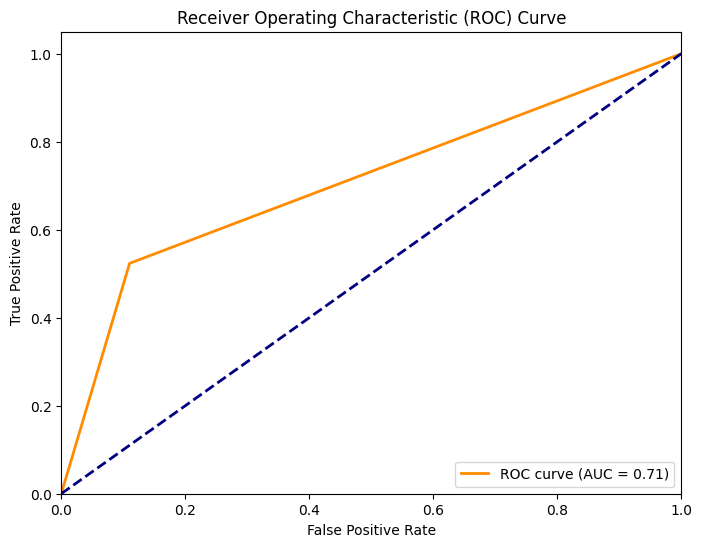

In [154]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#  ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_logreg)

#  AUC-ROC score. area under curve
roc_auc = roc_auc_score(Y_test, Y_pred_logreg)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [155]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[350,  13],
       [ 12, 179]], dtype=int64)

<AxesSubplot:>

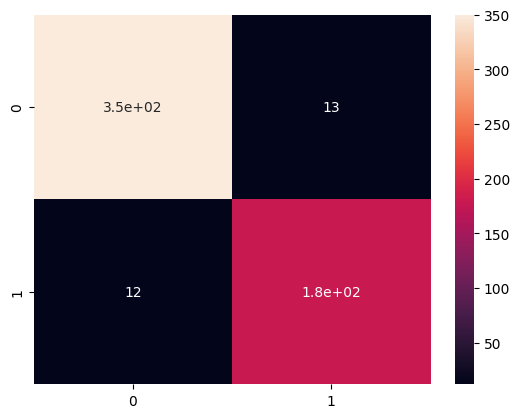

In [156]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [157]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       363
         1.0       0.93      0.94      0.93       191

    accuracy                           0.95       554
   macro avg       0.95      0.95      0.95       554
weighted avg       0.95      0.95      0.95       554



In [158]:
import pickle

# Save the trained KNN model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(knn, file)

